In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer  # Add this line
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [5]:
import os
# Get the current working directory
#current_directory = os.getcwd()
#print(f"Current Directory: {current_directory}")
#new_directory = "D:/Stevens/Fall 2024/Data BIA 810/MIS 637"
#os.chdir(new_directory)

# Verify the change
#print(f"Directory changed to: {os.getcwd()}")

In [6]:
DF1 = pd.read_csv("diabetes.csv")
DF2 = pd.read_csv("diabetes_prediction_dataset.csv")
DF1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
DF2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
merged_DF = pd.concat([DF1, DF2], axis=0, ignore_index=True)
merged_DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [9]:
merged_DF['gender'] = merged_DF['gender'].fillna('Female')
merged_DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [10]:
merged_DF['Age'] = merged_DF['Age'].fillna(0) + merged_DF['age'].fillna(0)
merged_DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [11]:
merged_DF.loc[(merged_DF['gender'] == 'Male') & (merged_DF['Pregnancies'].isna()), 'Pregnancies'] = 0

# Step 2: For females, fill NaN pregnancy values based on the distribution of existing values
# Extract the non-NaN pregnancy values for females
female_pregnancy_values = merged_DF[merged_DF['gender'] == 'Female']['Pregnancies'].dropna()

# Sample from the non-NaN pregnancy values for females
# This ensures the NaN values in the pregnancy column are replaced according to the distribution
merged_DF.loc[(merged_DF['gender'] == 'Female') & (merged_DF['Pregnancies'].isna()), 'Pregnancies'] = \
    np.random.choice(female_pregnancy_values, size=merged_DF[(merged_DF['gender'] == 'Female') & (merged_DF['Pregnancies'].isna())].shape[0])

merged_DF


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [12]:
na_count = merged_DF['Pregnancies'].isnull().sum()
na_count

18

In [13]:
# Update hypertension where BloodPressure > 80
merged_DF.loc[merged_DF['BloodPressure'] > 80, 'hypertension'] = 1

# Fill NaN values in 'hypertension' column with the corresponding values (1 if BloodPressure > 80, else 0)
merged_DF['hypertension'] = merged_DF['hypertension'].fillna((merged_DF['BloodPressure'] > 80).astype(int))

merged_DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [14]:
count_hypertension_1 = (merged_DF['hypertension'] == 1).sum()

print(count_hypertension_1)

7650


In [15]:
na_count = merged_DF['hypertension'].isnull().sum()
na_count

0

In [16]:
merged_DF['diabetes'] = merged_DF['Outcome'].fillna(0) + merged_DF['diabetes'].fillna(0)
merged_DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [17]:
na_count = merged_DF['diabetes'].isnull().sum()
na_count

0

In [18]:
Merged_DF = merged_DF.drop(['age', 'BloodPressure'], axis=1)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.0,0.0,33.6,0.627,50.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.0,0.0,26.6,0.351,31.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.0,0.0,23.3,0.672,32.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.0,94.0,28.1,0.167,21.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.0,168.0,43.1,2.288,33.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,NaN,NaN,NaN,NaN,66.0,NaN,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [19]:
# Calculate mean and standard deviation
mean = Merged_DF['SkinThickness'].mean()
std = Merged_DF['SkinThickness'].std()

# Replace NaN values with random values sampled from a normal distribution
Merged_DF['SkinThickness'] = Merged_DF['SkinThickness'].apply(
    lambda x: np.random.normal(mean, std) if pd.isnull(x) else x)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.0,33.6,0.627,50.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.0,26.6,0.351,31.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.0,23.3,0.672,32.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.0,28.1,0.167,21.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.0,43.1,2.288,33.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,NaN,NaN,NaN,80.0,NaN,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,26.608793,NaN,NaN,NaN,2.0,NaN,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,13.988856,NaN,NaN,NaN,66.0,NaN,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,7.516908,NaN,NaN,NaN,24.0,NaN,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [20]:
# Calculate mean and standard deviation
mean = Merged_DF['Insulin'].mean()
std = Merged_DF['Insulin'].std()

# Replace NaN values with random values sampled from a normal distribution
Merged_DF['Insulin'] = Merged_DF['Insulin'].apply(
    lambda x: np.random.normal(mean, std) if pd.isnull(x) else x)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.6,0.627,50.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.000000,26.6,0.351,31.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.000000,23.3,0.672,32.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.000000,28.1,0.167,21.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.000000,43.1,2.288,33.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,NaN,NaN,80.0,NaN,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,NaN,NaN,2.0,NaN,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,NaN,NaN,66.0,NaN,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,NaN,NaN,24.0,NaN,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [21]:
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.6,0.627,50.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.000000,26.6,0.351,31.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.000000,23.3,0.672,32.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.000000,28.1,0.167,21.0,0.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.000000,43.1,2.288,33.0,1.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,NaN,NaN,80.0,NaN,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,NaN,NaN,2.0,NaN,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,NaN,NaN,66.0,NaN,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,NaN,NaN,24.0,NaN,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [22]:
Merged_DF = Merged_DF.drop('Outcome', axis=1)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.6,0.627,50.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.000000,26.6,0.351,31.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.000000,23.3,0.672,32.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.000000,28.1,0.167,21.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.000000,43.1,2.288,33.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,NaN,NaN,80.0,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,NaN,NaN,2.0,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,NaN,NaN,66.0,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,NaN,NaN,24.0,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [23]:
Merged_DF['BMI'] = Merged_DF['BMI'].fillna(0) + Merged_DF['bmi'].fillna(0)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.60,0.627,50.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.000000,26.60,0.351,31.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.000000,23.30,0.672,32.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.000000,28.10,0.167,21.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.000000,43.10,2.288,33.0,Female,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,27.32,NaN,80.0,Female,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,17.37,NaN,2.0,Female,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,27.83,NaN,66.0,Male,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,35.42,NaN,24.0,Female,0.0,0.0,never,35.42,4.0,100.0,0.0


In [24]:
Merged_DF = Merged_DF.drop('bmi', axis=1)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.60,0.627,50.0,Female,0.0,NaN,NaN,NaN,NaN,1.0
1,1.0,85.0,29.000000,0.000000,26.60,0.351,31.0,Female,0.0,NaN,NaN,NaN,NaN,0.0
2,8.0,183.0,0.000000,0.000000,23.30,0.672,32.0,Female,0.0,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,23.000000,94.000000,28.10,0.167,21.0,Female,0.0,NaN,NaN,NaN,NaN,0.0
4,0.0,137.0,35.000000,168.000000,43.10,2.288,33.0,Female,0.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,27.32,NaN,80.0,Female,0.0,0.0,No Info,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,17.37,NaN,2.0,Female,0.0,0.0,No Info,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,27.83,NaN,66.0,Male,0.0,0.0,former,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,35.42,NaN,24.0,Female,0.0,0.0,never,4.0,100.0,0.0


In [25]:
Merged_DF['blood_glucose_level'] = Merged_DF['blood_glucose_level'].fillna(0) + Merged_DF['Glucose'].fillna(0)
Merged_DF

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,35.000000,0.000000,33.60,0.627,50.0,Female,0.0,NaN,NaN,NaN,148.0,1.0
1,1.0,85.0,29.000000,0.000000,26.60,0.351,31.0,Female,0.0,NaN,NaN,NaN,85.0,0.0
2,8.0,183.0,0.000000,0.000000,23.30,0.672,32.0,Female,0.0,NaN,NaN,NaN,183.0,1.0
3,1.0,89.0,23.000000,94.000000,28.10,0.167,21.0,Female,0.0,NaN,NaN,NaN,89.0,0.0
4,0.0,137.0,35.000000,168.000000,43.10,2.288,33.0,Female,0.0,NaN,NaN,NaN,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,NaN,29.462387,116.338944,27.32,NaN,80.0,Female,0.0,0.0,No Info,6.2,90.0,0.0
100764,6.0,NaN,26.608793,11.766765,17.37,NaN,2.0,Female,0.0,0.0,No Info,6.5,100.0,0.0
100765,0.0,NaN,13.988856,49.736778,27.83,NaN,66.0,Male,0.0,0.0,former,5.7,155.0,0.0
100766,1.0,NaN,7.516908,42.382265,35.42,NaN,24.0,Female,0.0,0.0,never,4.0,100.0,0.0


In [26]:
Merged_DF = Merged_DF.drop('Glucose', axis=1)
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,35.000000,0.000000,33.60,0.627,50.0,Female,0.0,NaN,NaN,NaN,148.0,1.0
1,1.0,29.000000,0.000000,26.60,0.351,31.0,Female,0.0,NaN,NaN,NaN,85.0,0.0
2,8.0,0.000000,0.000000,23.30,0.672,32.0,Female,0.0,NaN,NaN,NaN,183.0,1.0
3,1.0,23.000000,94.000000,28.10,0.167,21.0,Female,0.0,NaN,NaN,NaN,89.0,0.0
4,0.0,35.000000,168.000000,43.10,2.288,33.0,Female,0.0,NaN,NaN,NaN,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,NaN,80.0,Female,0.0,0.0,No Info,6.2,90.0,0.0
100764,6.0,26.608793,11.766765,17.37,NaN,2.0,Female,0.0,0.0,No Info,6.5,100.0,0.0
100765,0.0,13.988856,49.736778,27.83,NaN,66.0,Male,0.0,0.0,former,5.7,155.0,0.0
100766,1.0,7.516908,42.382265,35.42,NaN,24.0,Female,0.0,0.0,never,4.0,100.0,0.0


In [27]:
min_val = Merged_DF['DiabetesPedigreeFunction'].min()
max_val = Merged_DF['DiabetesPedigreeFunction'].max()

# Replace NaN values with random values sampled from a uniform distribution
Merged_DF['DiabetesPedigreeFunction'] = merged_DF['DiabetesPedigreeFunction'].apply(
    lambda x: np.random.uniform(min_val, max_val) if pd.isna(x) else x
)
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,Female,0.0,NaN,NaN,NaN,148.0,1.0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,Female,0.0,NaN,NaN,NaN,85.0,0.0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,Female,0.0,NaN,NaN,NaN,183.0,1.0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,Female,0.0,NaN,NaN,NaN,89.0,0.0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,Female,0.0,NaN,NaN,NaN,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,Female,0.0,0.0,No Info,6.2,90.0,0.0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,Female,0.0,0.0,No Info,6.5,100.0,0.0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,Male,0.0,0.0,former,5.7,155.0,0.0
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,Female,0.0,0.0,never,4.0,100.0,0.0


In [28]:
# Calculate the mode (most frequent value)
mode_value = Merged_DF['heart_disease'].mode()[0]

# Fill NaN values with the mode
Merged_DF['heart_disease'].fillna(mode_value, inplace=True)

Merged_DF

<ipython-input-28-05d2f32cdc17>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Merged_DF['heart_disease'].fillna(mode_value, inplace=True)


,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,Female,0.0,0.0,NaN,NaN,148.0,1.0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,Female,0.0,0.0,NaN,NaN,85.0,0.0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,Female,0.0,0.0,NaN,NaN,183.0,1.0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,Female,0.0,0.0,NaN,NaN,89.0,0.0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,Female,0.0,0.0,NaN,NaN,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,Female,0.0,0.0,No Info,6.2,90.0,0.0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,Female,0.0,0.0,No Info,6.5,100.0,0.0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,Male,0.0,0.0,former,5.7,155.0,0.0
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,Female,0.0,0.0,never,4.0,100.0,0.0


In [29]:
na_count = Merged_DF['Insulin'].isnull().sum()
na_count

0

In [30]:
negative_count = (merged_DF['DiabetesPedigreeFunction'] < 0).sum()
print(f"Number of negative values: {negative_count}")

Number of negative values: 0


In [31]:
negative_count = (merged_DF['SkinThickness'] < 0).sum()
print(f"Number of negative values: {negative_count}")

Number of negative values: 0


In [32]:
negative_count = (merged_DF['Insulin'] < 0).sum()
print(f"Number of negative values: {negative_count}")

Number of negative values: 0


In [33]:
# Calculate mean and standard deviation
mean = Merged_DF['HbA1c_level'].mean()
std = Merged_DF['HbA1c_level'].std()

# Replace NaN values with random values sampled from a normal distribution
Merged_DF['HbA1c_level'] = Merged_DF['HbA1c_level'].apply(
    lambda x: np.random.normal(mean, std) if pd.isnull(x) else x)
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,Female,0.0,0.0,NaN,4.873268,148.0,1.0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,Female,0.0,0.0,NaN,6.177754,85.0,0.0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,Female,0.0,0.0,NaN,4.431211,183.0,1.0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,Female,0.0,0.0,NaN,5.895643,89.0,0.0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,Female,0.0,0.0,NaN,4.537302,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,Female,0.0,0.0,No Info,6.200000,90.0,0.0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,Female,0.0,0.0,No Info,6.500000,100.0,0.0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,Male,0.0,0.0,former,5.700000,155.0,0.0
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,Female,0.0,0.0,never,4.000000,100.0,0.0


In [34]:
Merged_DF['Gender'] = np.where(Merged_DF['gender'] == 'Female', 0, 1)
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,Gender
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,Female,0.0,0.0,NaN,4.873268,148.0,1.0,0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,Female,0.0,0.0,NaN,6.177754,85.0,0.0,0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,Female,0.0,0.0,NaN,4.431211,183.0,1.0,0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,Female,0.0,0.0,NaN,5.895643,89.0,0.0,0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,Female,0.0,0.0,NaN,4.537302,137.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,Female,0.0,0.0,No Info,6.200000,90.0,0.0,0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,Female,0.0,0.0,No Info,6.500000,100.0,0.0,0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,Male,0.0,0.0,former,5.700000,155.0,0.0,1
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,Female,0.0,0.0,never,4.000000,100.0,0.0,0


In [35]:
Merged_DF = Merged_DF.drop('gender', axis=1)
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,Gender
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,0.0,0.0,NaN,4.873268,148.0,1.0,0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,0.0,0.0,NaN,6.177754,85.0,0.0,0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,0.0,0.0,NaN,4.431211,183.0,1.0,0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,0.0,0.0,NaN,5.895643,89.0,0.0,0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,0.0,0.0,NaN,4.537302,137.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,0.0,0.0,No Info,6.200000,90.0,0.0,0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,0.0,0.0,No Info,6.500000,100.0,0.0,0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,0.0,0.0,former,5.700000,155.0,0.0,1
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,0.0,0.0,never,4.000000,100.0,0.0,0


In [36]:
count_hypertension = (merged_DF['smoking_history'] == 'No Info').sum()
print(f"Number of no info cases: {count_hypertension}")

Number of no info cases: 35816


In [37]:
Merged_DF['smoking_history'] = np.where(
    Merged_DF['smoking_history'] == 'No Info', 0,
    np.where(Merged_DF['smoking_history'] == 'never', 1,
    np.where(Merged_DF['smoking_history'] == 'former', 2,
    np.where(Merged_DF['smoking_history'] == 'current', 3, np.nan))))

Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,Gender
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,0.0,0.0,NaN,4.873268,148.0,1.0,0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,0.0,0.0,NaN,6.177754,85.0,0.0,0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,0.0,0.0,NaN,4.431211,183.0,1.0,0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,0.0,0.0,NaN,5.895643,89.0,0.0,0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,0.0,0.0,NaN,4.537302,137.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,0.0,0.0,0.0,6.200000,90.0,0.0,0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,0.0,0.0,0.0,6.500000,100.0,0.0,0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,0.0,0.0,2.0,5.700000,155.0,0.0,1
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,0.0,0.0,1.0,4.000000,100.0,0.0,0


In [38]:
# Calculate the mode (most frequent value)
mode_value = Merged_DF['smoking_history'].mode()[0]

# Fill NaN values with the mode
Merged_DF['smoking_history'].fillna(mode_value, inplace=True)

Merged_DF

<ipython-input-38-0bf5a465f81e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Merged_DF['smoking_history'].fillna(mode_value, inplace=True)


,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,Gender
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,0.0,0.0,0.0,4.873268,148.0,1.0,0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,0.0,0.0,0.0,6.177754,85.0,0.0,0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,0.0,0.0,0.0,4.431211,183.0,1.0,0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,0.0,0.0,0.0,5.895643,89.0,0.0,0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,0.0,0.0,0.0,4.537302,137.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,0.0,0.0,0.0,6.200000,90.0,0.0,0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,0.0,0.0,0.0,6.500000,100.0,0.0,0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,0.0,0.0,2.0,5.700000,155.0,0.0,1
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,0.0,0.0,1.0,4.000000,100.0,0.0,0


In [39]:
na_count = Merged_DF['Pregnancies'].isnull().sum()
na_count

18

In [40]:
Merged_DF = Merged_DF.dropna(subset=['Pregnancies'])
Merged_DF

,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes,Gender
0,6.0,35.000000,0.000000,33.60,0.627000,50.0,0.0,0.0,0.0,4.873268,148.0,1.0,0
1,1.0,29.000000,0.000000,26.60,0.351000,31.0,0.0,0.0,0.0,6.177754,85.0,0.0,0
2,8.0,0.000000,0.000000,23.30,0.672000,32.0,0.0,0.0,0.0,4.431211,183.0,1.0,0
3,1.0,23.000000,94.000000,28.10,0.167000,21.0,0.0,0.0,0.0,5.895643,89.0,0.0,0
4,0.0,35.000000,168.000000,43.10,2.288000,33.0,0.0,0.0,0.0,4.537302,137.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,6.0,29.462387,116.338944,27.32,1.584007,80.0,0.0,0.0,0.0,6.200000,90.0,0.0,0
100764,6.0,26.608793,11.766765,17.37,2.284423,2.0,0.0,0.0,0.0,6.500000,100.0,0.0,0
100765,0.0,13.988856,49.736778,27.83,1.114888,66.0,0.0,0.0,2.0,5.700000,155.0,0.0,1
100766,1.0,7.516908,42.382265,35.42,0.434943,24.0,0.0,0.0,1.0,4.000000,100.0,0.0,0


In [41]:
na_count = Merged_DF['SkinThickness'].isnull().sum()
na_count

0

In [42]:
na_count = Merged_DF['Insulin'].isnull().sum()
na_count

0

In [43]:
na_count = Merged_DF['BMI'].isnull().sum()
na_count

0

In [44]:
na_count = Merged_DF['diabetes'].isnull().sum()
na_count

0

# Logistic Regression

In [45]:
X = Merged_DF.drop('diabetes', axis=1)  # Replace 'target_column' with your actual target
y = Merged_DF['diabetes']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if you get convergence warnings

# Train the model with the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [47]:
# Predict on the test set
y_pred = model.predict(X_test)

In [48]:
 #Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report (includes precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9583126550868486
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     18421
         1.0       0.87      0.60      0.71      1729

    accuracy                           0.96     20150
   macro avg       0.92      0.80      0.85     20150
weighted avg       0.96      0.96      0.95     20150

Confusion Matrix:
[[18269   152]
 [  688  1041]]


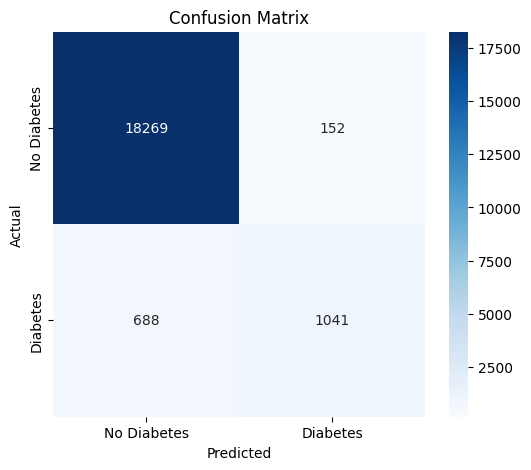

Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.96      0.99      0.98     18421
    Diabetes       0.87      0.60      0.71      1729

    accuracy                           0.96     20150
   macro avg       0.92      0.80      0.85     20150
weighted avg       0.96      0.96      0.95     20150



In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are your true and predicted values
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix with Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("\033[1mClassification Report:\033[0m\n")
print(report)

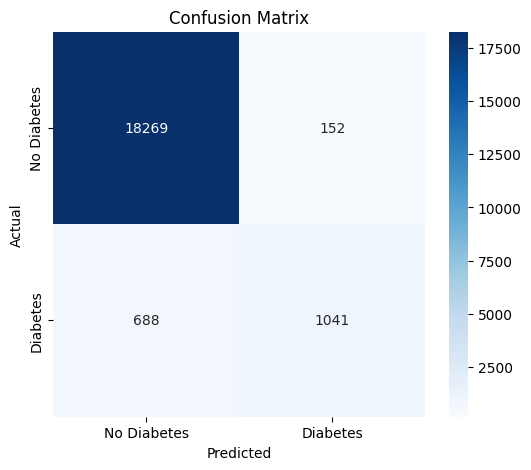

Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.96      0.99      0.98     18421
    Diabetes       0.87      0.60      0.71      1729

    accuracy                           0.96     20150
   macro avg       0.92      0.80      0.85     20150
weighted avg       0.96      0.96      0.95     20150



In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Ensure y_test and y_pred contain all the classes (e.g., 0 and 1)
# Adjust labels to match your dataset's classes
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display Confusion Matrix with Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("\033[1mClassification Report:\033[0m\n")
print(report)

# Decision Tree

Accuracy: 0.9467

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     18421
         1.0       0.68      0.70      0.69      1729

    accuracy                           0.95     20150
   macro avg       0.83      0.84      0.83     20150
weighted avg       0.95      0.95      0.95     20150



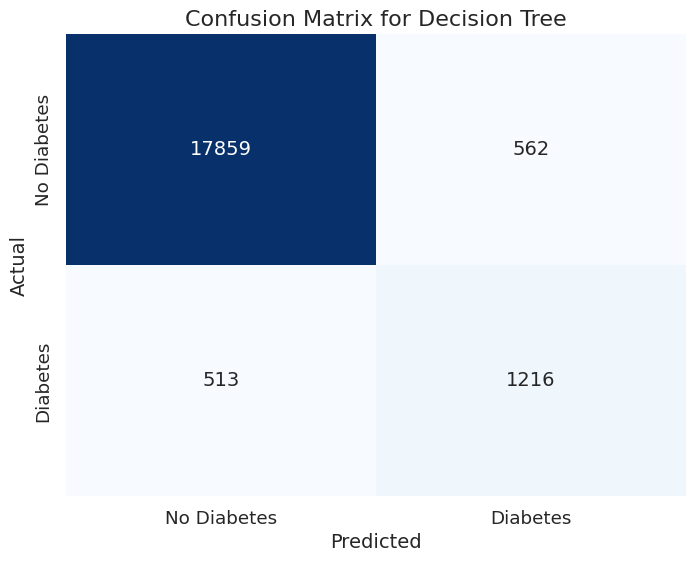

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))  # Adjust figure size for better clarity
sns.set(font_scale=1.2)  # Increase font size for readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"],
            annot_kws={"size": 14}, cbar=False)

# Add axis labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for Decision Tree', fontsize=16)

# Show the plot
plt.show()

# Neural Networks

In [52]:
# Use your existing DataFrame (assuming it's named df)
# Separate features and target
X = Merged_DF.drop('diabetes', axis=1)
y = Merged_DF['diabetes']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'smoking_history']
numerical_cols = ['Pregnancies', 'SkinThickness','Insulin','Age', 'BMI', 'HbA1c_level', 'DiabetesPedigreeFunction', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Preprocessing: OneHotEncoder for categorical, StandardScaler for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_processed, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2015/2015 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9279 - loss: 0.2008 - val_accuracy: 0.9563 - val_loss: 0.1269
Epoch 2/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9584 - loss: 0.1244 - val_accuracy: 0.9599 - val_loss: 0.1193
Epoch 3/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9632 - loss: 0.1141 - val_accuracy: 0.9657 - val_loss: 0.1081
Epoch 4/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9666 - loss: 0.1040 - val_accuracy: 0.9647 - val_loss: 0.1044
Epoch 5/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1031 - val_accuracy: 0.9669 - val_loss: 0.1012
Epoch 6/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9676 - loss: 0.1008 - val_accuracy: 0.9668 - val_loss: 0.0994
Epoch 7/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9670 - loss: 0.0983 - val_accuracy: 0.9667 - val_loss: 0.0978
Epoch 8/20
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9679 - loss: 0.0966 - val_accurac

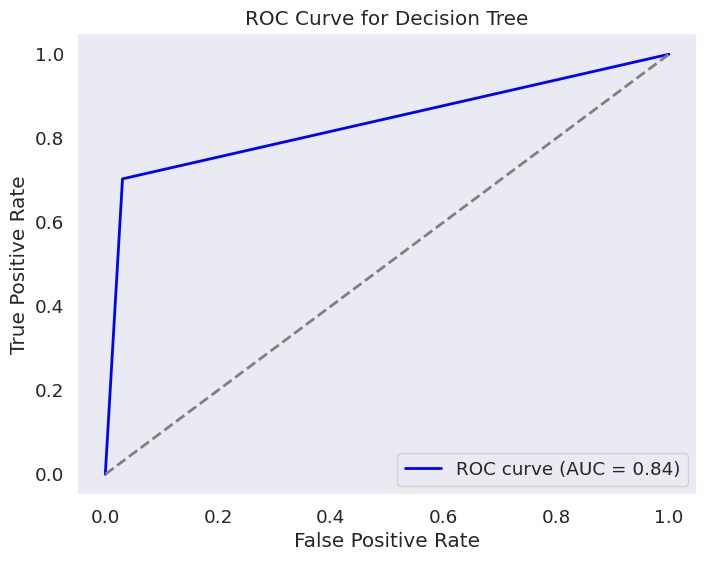

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

# Dataset preparation (already provided)
X = Merged_DF.drop('diabetes', axis=1)  # Replace 'diabetes' with your actual target column name
y = Merged_DF['diabetes']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability for the positive class (diabetes)

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Alternatively, use roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()